In [1]:
import os
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [2]:
file_name = '/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv'
df = pd.read_csv(file_name)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013/9/16,38.830002,38.990002,38.669998,38.830002,34.026104,440200
1,2013/9/17,38.490002,38.799999,38.360001,38.669998,33.885891,442700
2,2013/9/18,38.720001,39.860001,38.720001,39.799999,34.876091,742500
3,2013/9/19,39.770000,39.830002,39.529999,39.590000,34.692081,353300
4,2013/9/20,39.200001,39.340000,38.830002,38.900002,34.087433,877400
5,2013/9/23,39.029999,39.040001,38.700001,38.919998,34.104969,201000
6,2013/9/24,38.990002,39.240002,38.820000,38.959999,34.140015,224200
7,2013/9/25,38.869999,38.900002,38.549999,38.759998,34.135738,169800
8,2013/9/26,39.070000,39.270000,38.889999,39.189999,34.514431,196300
9,2013/9/27,38.689999,38.779999,38.599998,38.720001,34.100506,148300


In [3]:
def buy(cost,price):
    shares = cost / price
    return shares

def sell(cost,shares, price):
    revenue = shares * price
    profit = revenue - cost
    return profit

def compute_BB_df(df, win, k):
    cost = 100
    shares = []
    profit = [] 
    try:
        new_df = df.copy()
        new_df.rename(columns={'Adj Close': 'Price'}, inplace = True)
        new_df = new_df[['Date', 'Price']]
        new_df['ma'] = new_df['Price'].rolling(win).mean()
        new_df['std'] = new_df['Price'].rolling(win).std()        
        new_df['lower_band'] = new_df['ma']- k* new_df['std']
        new_df['upper_band'] = new_df['ma'] + k* new_df['std']
        new_df['sell'] = new_df['Price'] < new_df['lower_band']
        new_df['buy'] = new_df['Price'] > new_df['upper_band']
        
        columnsTitles = ['Date','Price','ma','std','lower_band','upper_band','buy','sell']
        new_df = new_df[columnsTitles]
        conditions = [(new_df['buy']== True) & (new_df['sell'] == False), (new_df['buy']== False) & (new_df['sell'] == True),(new_df['buy']== False) & (new_df['sell'] == False)]
        choices = [1,1 ,0]
        new_df['suppose_trans'] = np.select(conditions,choices)
        
        
        df_trans = new_df[new_df['suppose_trans']==1]
        df_trans['real_trans'] = np.where(df_trans['buy'] !=df_trans['buy'].shift(+1),1,0) 
    


        df_trans = df_trans.reset_index()
        #if (df_trans.loc[0]['real_trans'] == 1) and (df_trans.loc[0]['sell']==True):
         #   df_trans.loc[0]['real_trans'] = 0
        
        
        for row in range(len(df_trans)):
            if (df_trans.loc[row]['buy'] == True) and (df_trans.loc[row]['real_trans'] ==1):
                shares.append(buy(cost,df_trans.loc[row]['Price'])) 
            elif (df_trans.loc[row]['buy'] == True) and (df_trans.loc[row]['real_trans'] ==0):
                shares.append(shares[len(shares)-1])
            else:
                shares.append(0)
        df_trans['shares']= shares
        

        for row in range(len(df_trans)):
            if (df_trans.loc[row]['sell'] == True) and (df_trans.loc[row]['real_trans'] == 1):
                if row ==0:
                    profit.append(0)
                else:
                    profit.append(sell(cost,df_trans.loc[row-1]['shares'],df_trans.loc[row]['Price']))  
            else:
                profit.append(0)
        df_trans['profit']= profit

        return df_trans
    
    except Exception as e:
        print(e)
        return None

In [4]:
df_BB = compute_BB_df(df, 14, 0.5)
df_BB



/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,Date,Price,ma,std,lower_band,upper_band,buy,sell,suppose_trans,real_trans,shares,profit
0,13,2013/10/3,33.528057,34.075299,0.402033,33.874282,34.276315,False,True,1,1,0.000000,0.000000
1,14,2013/10/4,33.792271,34.058596,0.409031,33.854081,34.263112,False,True,1,0,0.000000,0.000000
2,15,2013/10/7,33.387142,34.022971,0.445338,33.800302,34.245640,False,True,1,0,0.000000,0.000000
3,16,2013/10/8,33.431179,33.919763,0.397252,33.721137,34.118389,False,True,1,0,0.000000,0.000000
4,17,2013/10/9,34.408760,33.899526,0.360387,33.719333,34.079720,True,False,1,1,2.906237,0.000000
5,18,2013/10/10,35.298264,33.986014,0.519235,33.726397,34.245631,True,False,1,0,2.906237,0.000000
6,19,2013/10/11,35.333477,34.073765,0.632368,33.757580,34.389949,True,False,1,0,2.906237,0.000000
7,20,2013/10/14,35.368710,34.161528,0.721282,33.800887,34.522170,True,False,1,0,2.906237,0.000000
8,21,2013/10/15,34.849102,34.212483,0.744155,33.840406,34.584561,True,False,1,0,2.906237,0.000000
9,22,2013/10/16,35.183765,34.260293,0.785404,33.867590,34.652995,True,False,1,0,2.906237,0.000000


In [5]:
# count the total number of transactions 
def count_trans(df):
    total_real_trans = sum(df['real_trans'] )
    if total_real_trans ==0:
        return total_real_trans
    else:
        if (df.loc[0]['real_trans'] ==1) and (df.loc[0]['sell']==True):
            total_real_trans  -= 1
        if (df.loc[len(df)-1]['real_trans'] ==1) and (df.loc[len(df)-1]['buy']==True):
            total_real_trans -=1
        total_trans = total_real_trans/2
        return total_trans

# count the average profit of total transactions 
def count_PL(df):
    total_profit= sum(df['profit'])
    if count_trans(df)==0:
        total_average_profit = 'NA'
    else:
        total_average_profit = total_profit/ count_trans(df)
    return total_average_profit
    

In [6]:
windows = []
transactions = []
avg_profit = []
win_lost = []
size = []
ks=[]

k_list = [0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75 ,3, 3.25, 3.5, 3.75]

for w in range(14, 100, 7):
    for k in k_list:
        #print(w, k)
        windows.append(w)
        ks.append(k)
        df_BB = compute_BB_df(df,w,k)
        transactions.append(count_trans(df_BB))
        avg_profit.append(count_PL(df_BB))
       
        if count_PL(df_BB)== 'NA':
            win_lost.append('NA')
        elif count_PL(df_BB)>0:
            win_lost.append('win')
        else:
            win_lost.append('lost')
            
        if count_PL(df_BB) == 'NA':
            size.append(0)
        elif abs(count_PL(df_BB)) >= 0 and abs(count_PL(df_BB))<0.25:
            size.append(1)
        elif abs(count_PL(df_BB)) >= 0.25 and abs(count_PL(df_BB))<0.5:
            size.append(2)
        elif abs(count_PL(df_BB)) >= 0.5 and abs(count_PL(df_BB))<0.75:
            size.append(3)
        elif abs(count_PL(df_BB)) >= 0.75 and  abs(count_PL(df_BB))<1:
            size.append(4)
        elif abs(count_PL(df_BB)) >= 1 and  abs(count_PL(df_BB))<1.25:
            size.append(5)
        elif abs(count_PL(df_BB)) >= 1.25 and  abs(count_PL(df_BB))<1.5:
            size.append(6)
        elif abs(count_PL(df_BB)) >= 1.5 and abs(count_PL(df_BB))<1.75:
            size.append(7)
        elif abs(count_PL(df_BB)) >= 1.75 and abs(count_PL(df_BB))<2:
            size.append(8)
        else:
            size.append(9)

d = {'k': ks, 'windows': windows, '# of transactions' :transactions,'average P/L': avg_profit,'win/lost':win_lost,'size':size}
df_wins = pd.DataFrame(data=d)      
            
df_wins       
                   



/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,k,windows,# of transactions,average P/L,win/lost,size
0,0.50,14,49.0,-0.200358,lost,1
1,1.00,14,37.0,-0.187187,lost,1
2,1.25,14,31.0,-0.233056,lost,1
3,1.50,14,25.0,0.18631,win,1
4,1.75,14,22.0,-0.376313,lost,2
5,2.00,14,13.0,1.70841,win,7
6,2.25,14,10.0,0.730495,win,3
7,2.50,14,5.0,-2.12839,lost,9
8,2.75,14,1.0,5.10268,win,9
9,3.00,14,0.0,NA,NA,0


In [7]:
df_wins = df_wins[df_wins['# of transactions']!=0]
df_wins

,k,windows,# of transactions,average P/L,win/lost,size
0,0.50,14,49.0,-0.200358,lost,1
1,1.00,14,37.0,-0.187187,lost,1
2,1.25,14,31.0,-0.233056,lost,1
3,1.50,14,25.0,0.18631,win,1
4,1.75,14,22.0,-0.376313,lost,2
5,2.00,14,13.0,1.70841,win,7
6,2.25,14,10.0,0.730495,win,3
7,2.50,14,5.0,-2.12839,lost,9
8,2.75,14,1.0,5.10268,win,9
13,0.50,21,42.0,-0.611013,lost,3


In [8]:
sorted_df_wins = df_wins.sort_values(by=['average P/L'],ascending=False)
sorted_df_wins

,k,windows,# of transactions,average P/L,win/lost,size
87,3.00,56,1.0,17.3532,win,9
137,2.50,84,1.0,17.3365,win,9
99,2.75,63,1.0,16.3377,win,9
163,2.50,98,1.0,15.8754,win,9
122,2.00,77,3.0,7.0644,win,9
135,2.00,84,3.0,7.0644,win,9
111,2.50,70,2.0,6.71345,win,9
148,2.00,91,3.0,6.42293,win,9
124,2.50,77,2.0,6.32536,win,9
112,2.75,70,1.0,6.30049,win,9


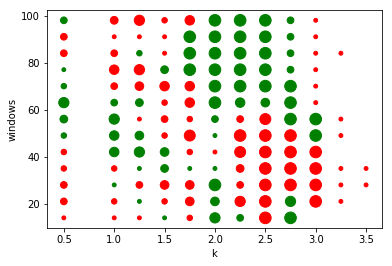

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

colors = np.where(df_wins['win/lost'] =='win' , 'g', 'r')
# plotting
df_wins.plot(kind='scatter', x='k', y='windows',c=colors, s=df_wins['size']*15)
plt.show()

From the above two graphs, I found that:
The best combination of k and window is: 2 <= k < 3 and 60 < win < 80